In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# fxn for plotting
def get_ax(figsize=(6,4), fsize=15):
    fig, ax = plt.subplots(figsize=figsize)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return ax, fsize

In [3]:
def gaussian(x, a, b, c, d):
#     num = -(x - b)**2
#     den = 2 * c**2
#     return a * np.exp(num / den)
    return (a * np.exp((-(x-b)**2)/(2*c**2))) + d

In [19]:
def dg(x, a1, b1, c1, d1, a2, b2, c2, d2):
    return gaussian(x, a1, b1, c1, d1) + gaussian(x, a2, b2, c2, d2)

In [4]:
# mils and mils for background lists
mils = np.arange(180, 300, 5)
# mils = []
mils_bgnd = [mils[i] for i in range(len(mils)) if i % 2 == 0]

In [5]:
len(mils), len(mils_bgnd)

(24, 12)

In [6]:
mils

array([180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240,
       245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295])

In [7]:
# data and error lists for no B field
noB_data = [2.8, 2.5, 2.7, 2.1, 3, 3, 3.5, 3.9, 4.1, 4.8, 6.7, 11, 16, 20, 21.2, 19, 17, 11, 7.2, 5, 4.9, 3.7, 3.6, 3.2]
noB_data_e = 0.2

noB_bgnd = [2.3, 2.3, 2.7, 2.9, 2.8, 2.6, 2.3, 3.1, 2.7, 2.5, 2.4, 2.2]
noB_bgnd_e = 0.2

len(noB_data), len(noB_bgnd)

(24, 12)

In [8]:
mils_B = np.arange(190, 315, 5)
mils_Bb = [mils_B[i] for i in range(len(mils_B)) if i % 2 == 0]
mils_Bb

[190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310]

In [9]:
# data and error lists for B field
B_data = [4.9, 5.3, 5.9, 6.4, 7.3, 8, 9.1, 9.4, 10, 8.3, 6.7, 5.1, 4.9, 5.1, 6.1, 7.7, 11, 10, 8.6, 8, 7.8, 6.4, 5.9, 5.5, 4.9]
B_data_e = 0.2
len(mils_B), len(B_data)

(25, 25)

In [10]:
# background and background error lists for B field
B_bgnd = [2.3, 2.1, 2, 3.8, 2.3, 2.1, 2.2, 2.1, 2, 2.2, 2, 1.9, 1.8]
B_bgnd_e = 0.2

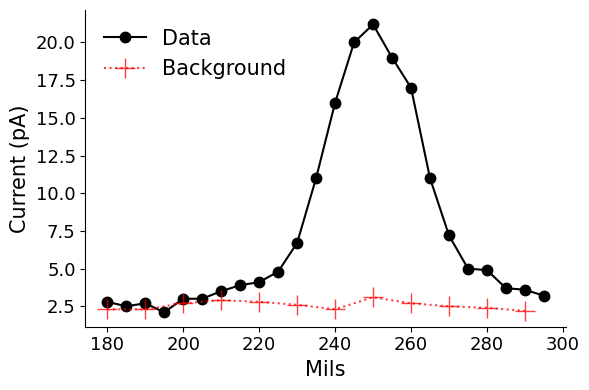

In [83]:
# plotting
ax, fsize = get_ax()

plt.plot(mils, noB_data, c="0", marker=".", markersize=fsize, label="Data")
# plt.errorbar(mils, noB_data, yerr=noB_data_e)

plt.plot(mils_bgnd, noB_bgnd, c="r", marker="+", linestyle=":", markersize=fsize, label="Background", alpha=0.75)
# plt.errorbar(mils_bgnd, noB_bgnd, yerr=noB_bgnd_e)

plt.xticks(size=fsize-2)
plt.yticks(size=fsize-2)

plt.xlabel("Mils", size=fsize)
plt.ylabel("Current (pA)", size=fsize)
plt.legend(fontsize=fsize, frameon=False)

plt.tight_layout()
plt.savefig(f"Plots/noB.pdf")

In [12]:
# a, b, c, d = 20, 250, 10, 3
# guess = [gaussian(x, a, b, c, d) for x in mils]

# plt.plot(mils, noB_data, c="0", marker=".", markersize=fsize, label="Data")
# plt.plot(mils, guess, c="r", marker="+", markersize=fsize, label="Data")

[ 18.22993    250.1631366   11.81668331   3.0795299 ]


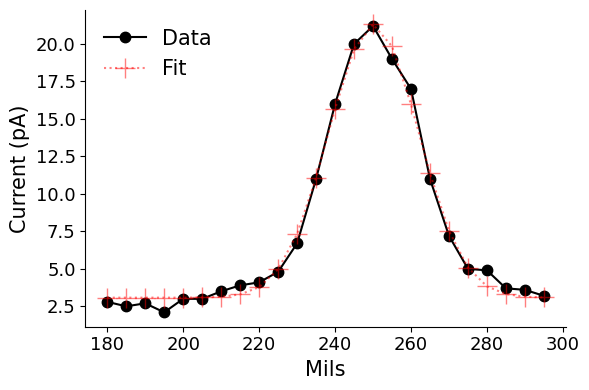

In [24]:
param, param_cov = curve_fit(gaussian, mils, noB_data, p0=[20, 250, 10, 3], maxfev=10000)
a, b, c, d = param
print(param)

fit = [gaussian(x, a, b, c, d) for x in mils]

# plotting
ax, fsize = get_ax()

plt.plot(mils, noB_data, c="0", marker=".", markersize=fsize, label="Data")
# plt.errorbar(mils, noB_data, yerr=noB_data_e)

plt.plot(mils, fit, c="r", marker="+", linestyle=":", markersize=fsize, label="Fit", alpha=0.5)
# plt.errorbar(mils_bgnd, noB_bgnd, yerr=noB_bgnd_e)

plt.xticks(size=fsize-2)
plt.yticks(size=fsize-2)

plt.xlabel("Mils", size=fsize)
plt.ylabel("Current (pA)", size=fsize)
plt.legend(fontsize=fsize, frameon=False, loc="upper left")

# plt.title("$\delta=$"+str(delta_list[d_idx])+", $\epsilon=$"+str(epsilon)[:5], size=fsize)

plt.tight_layout()
plt.savefig(f"Plots/noB_fit.pdf")

In [25]:
# fit_error = np.abs(np.array(noB_data) - np.array(fit))

# # plotting
# ax, fsize = get_ax()

# plt.plot(mils, fit_error, c="0", marker=".", markersize=fsize, label="Fit Error")

# plt.xticks(size=fsize-2)
# plt.yticks(size=fsize-2)

# plt.xlabel("Mils", size=fsize)
# plt.ylabel("Current (pA)", size=fsize)
# # plt.legend(fontsize=fsize, frameon=False)

# plt.tight_layout()
# # plt.savefig(f"Plots/noB_fit_error.pdf")

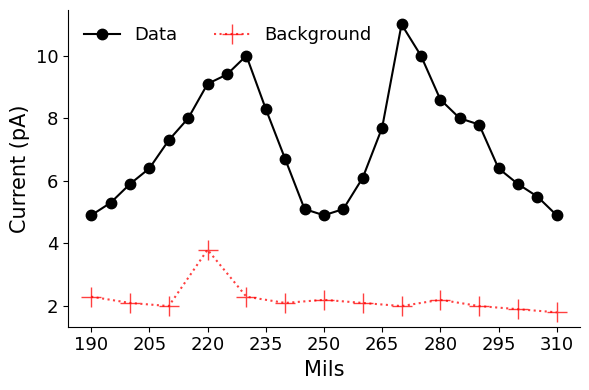

In [43]:
# plotting
ax, fsize = get_ax()

plt.plot(mils_B, B_data, c="0", marker=".", markersize=fsize, label="Data")
# plt.errorbar(mils, B_data, yerr=B_data_e)

plt.plot(mils_Bb, B_bgnd, c="r", marker="+", markersize=fsize, linestyle=":", label="Background", alpha=0.75)
# plt.errorbar(mils_bgnd, B_bgnd, yerr=B_bgnd_e)

ticks = [mils_B[i] for i in range(len(mils_B)) if i % 3 == 0]

plt.xticks(ticks, size=fsize-2)
plt.yticks(size=fsize-2)

plt.xlabel("Mils", size=fsize)
plt.ylabel("Current (pA)", size=fsize)
plt.legend(fontsize=fsize-2, frameon=False, ncol=2, loc="upper left")

plt.tight_layout()
plt.savefig(f"Plots/B.pdf")

[ 4.69346842e+00  2.24532407e+02  1.05566707e+01  3.41189196e+04
  5.00983044e+00  2.75547658e+02  9.96420033e+00 -3.41137819e+04]


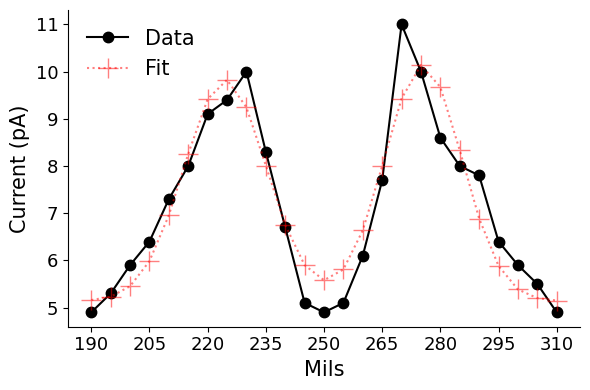

In [44]:
param, param_cov = curve_fit(dg, mils_B, B_data, p0=[20, 230, 10, 3, 20, 280, 10, 3])
a1, b1, c1, d1, a2, b2, c2, d2 = param
print(param)

fit_B = [dg(x, a1, b1, c1, d1, a2, b2, c2, d2) for x in mils_B]

# plotting
ax, fsize = get_ax()

plt.plot(mils_B, B_data, c="0", marker=".", markersize=fsize, label="Data")
# plt.errorbar(mils, noB_data, yerr=noB_data_e)

plt.plot(mils_B, fit_B, c="r", marker="+", linestyle=":", markersize=fsize, label="Fit", alpha=0.5)
# plt.errorbar(mils_bgnd, noB_bgnd, yerr=noB_bgnd_e)

plt.xticks(ticks, size=fsize-2)
plt.yticks(size=fsize-2)

plt.xlabel("Mils", size=fsize)
plt.ylabel("Current (pA)", size=fsize)
plt.legend(fontsize=fsize, frameon=False, loc="upper left")

plt.tight_layout()
plt.savefig(f"Plots/B_fit.pdf")

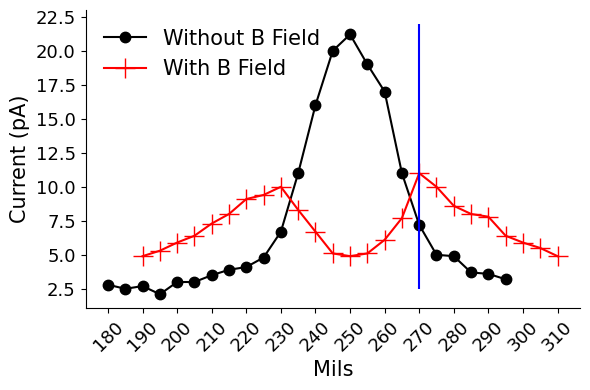

In [103]:
ax, fsize = get_ax()

plt.plot(mils, noB_data, c="0", marker=".", markersize=fsize, label="Without B Field")
plt.plot(mils_B, B_data, c="r", marker="+", markersize=fsize, label="With B Field")

big_ar = np.array(list(set(list(mils) + list(mils_B))))
big_ar.sort()
Ticks = [big_ar[i] for i in range(len(big_ar)) if i % 2 == 0]

plt.xticks(Ticks, size=fsize-2, rotation=45)
plt.yticks(size=fsize-2)

plt.xlabel("Mils", size=fsize)
plt.ylabel("Current (pA)", size=fsize)
plt.legend(fontsize=fsize, frameon=False)


plt.vlines(270, 2.5, 22, color="blue")

plt.tight_layout()
# plt.savefig(f"Plots/together.pdf")

In [89]:
# most probable speed
m = 6.4761*(10**-26)
k = 1.38064852*(10**-23)
t = 120+273.15
alpha = ((2*k*t)/m)**0.5

def I(v):
    v_trans = v / alpha
    return (2*v_trans**3)*np.exp(-(v_trans)**2)


v_lst = np.arange(0, 1500)
I_lst = np.array([I(v) for v in v_lst])

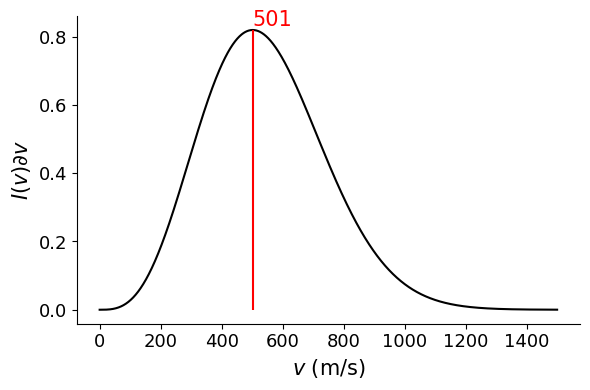

In [98]:
ax, fsize = get_ax()

plt.plot(v_lst, I_lst, c="0")

plt.vlines(I_lst.argmax(), 0, I_lst.max(), color="r")
plt.text(I_lst.argmax(), I_lst.max(), str(I_lst.argmax()), size=fsize, va="bottom", color="r")


plt.xticks(size=fsize-2)
plt.yticks(size=fsize-2)

plt.xlabel("$v$ (m/s)", size=fsize)
plt.ylabel("$I(v)\partial v$", size=fsize)

plt.tight_layout()
plt.savefig(f"Plots/vel.pdf")

In [99]:
alpha * np.sqrt(3)

709.1523687952903

In [110]:
d1 = 0.105
d2 = 0.29
M = 6.4761 * 10**(-26)
muB = 9.274 * 10**(-24)
v = 501
s = 0.000508
s = 0.000889

num = s * 2 * M * v
den = (d1**2 + 2 * d1 * d2) * muB

(num/den) * 20

1.7296811889136734